<a href="https://colab.research.google.com/github/vatsalvasani/CE155_ML/blob/main/LAB%205/CE155_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB 05**
## EXERCISE

## **Task 1: Try the algo on Same Weather dataset - LabelEncoding of features:and Train test Division 95%-5%**

[[1, 1, 0, 0], [1, 1, 0, 1], [0, 1, 0, 0], [2, 2, 0, 0], [2, 0, 1, 0], [2, 0, 1, 1], [0, 0, 1, 1], [1, 2, 0, 0], [1, 0, 1, 0], [2, 2, 1, 0], [1, 2, 1, 1], [0, 2, 0, 1], [0, 1, 1, 0], [2, 2, 0, 1]]
[[0], [0], [1], [1], [1], [0], [1], [0], [1], [1], [1], [1], [1], [0]]
[(0, 1, 0, 1), (0, 1, 1, 0), (0, 0, 1, 1), (0, 0, 1, 1), (0, 1, 1, 0), (0, 1, 0, 1), (1, 0, 0, 1), (1, 0, 1, 0), (1, 0, 0, 1), (1, 0, 1, 0), (1, 1, 0, 0), (1, 1, 0, 0), (0, 0, 1, 1), (0, 0, 1, 1), (0, 1, 0, 1), (0, 1, 1, 0), (0, 1, 0, 1), (0, 1, 1, 0), (1, 0, 1, 0), (1, 0, 0, 1), (1, 1, 0, 0), (1, 1, 0, 0), (1, 0, 0, 1), (1, 0, 1, 0)]
[1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1]


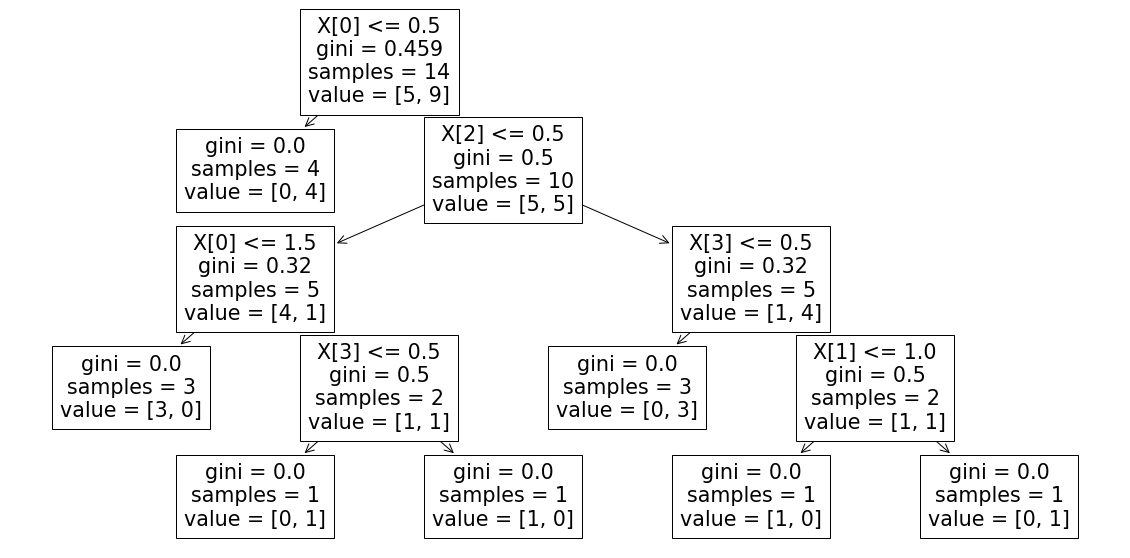

In [55]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
temp = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal','High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True','False', 'False', 'False', 'True', 'True', 'False', 'True']
play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No','Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

prepro=preprocessing

lb=prepro.LabelEncoder()

outlook=lb.fit_transform(outlook)
temp=lb.fit_transform(temp)
humidity=lb.fit_transform(humidity)
wind=lb.fit_transform(wind)
play=lb.fit_transform(play)

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

input=list(zip(outlook,temp,humidity,wind))
output=list(zip(play))

ri=0
for row in input:
  input[ri]=list(row)
  ri+=1

ri=0
for row in output:
  output[ri]=list(row)
  ri+=1

print(input)
print(output)

# model=DecisionTreeClassifier(max_depth=2)
model=DecisionTreeClassifier()
model.fit(input,output)


import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
tree.plot_tree(model)


seed=[0,1,0,1]

from itertools import permutations
test_input=list(permutations(seed))
print(test_input)
test_output=model.predict(test_input)
# print(accuracy_score(output, test_output))
# print ('Recall:',recall_score(output, test_output)
# print ('Precision:', precision_score(output, test_output)
print(test_output)


## **Task 2: Apply algorithm on wine dataset - LabelEncoding of features: and Train test Division 66%-34%**

In [56]:
from sklearn.datasets import load_wine
wine= load_wine()
input=wine.data
output=wine.target

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output = train_test_split(input,output,
                                   random_state=155, 
                                   test_size=0.34, 
                                   shuffle=True)


model=DecisionTreeClassifier()
model.fit(train_input,train_output)

test_pred=model.predict(test_input)
x = recall_score(test_pred, test_output,pos_label='positive',
                                           average='micro')
y = recall_score(test_pred, test_output,pos_label='positive',
                                           average='micro')
print('Recall:',x)
print('Precision:',y)
cmat=confusion_matrix(test_pred,test_output)

# truth=sum(cmat[i][i] for i in range(len(cmat)))
# total=0
# for row in cmat:
#   for elem in row:
#     total+=elem
# accuracy=truth/total

print("accuracy : ",accuracy)
path = model.cost_complexity_pruning_path(train_input,train_output)
alphas = path['ccp_alphas']
alphas

Recall: 0.8852459016393442
Precision: 0.8852459016393442
accuracy :  0.8852459016393442


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


array([0.        , 0.01668702, 0.10017889, 0.27000594])

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

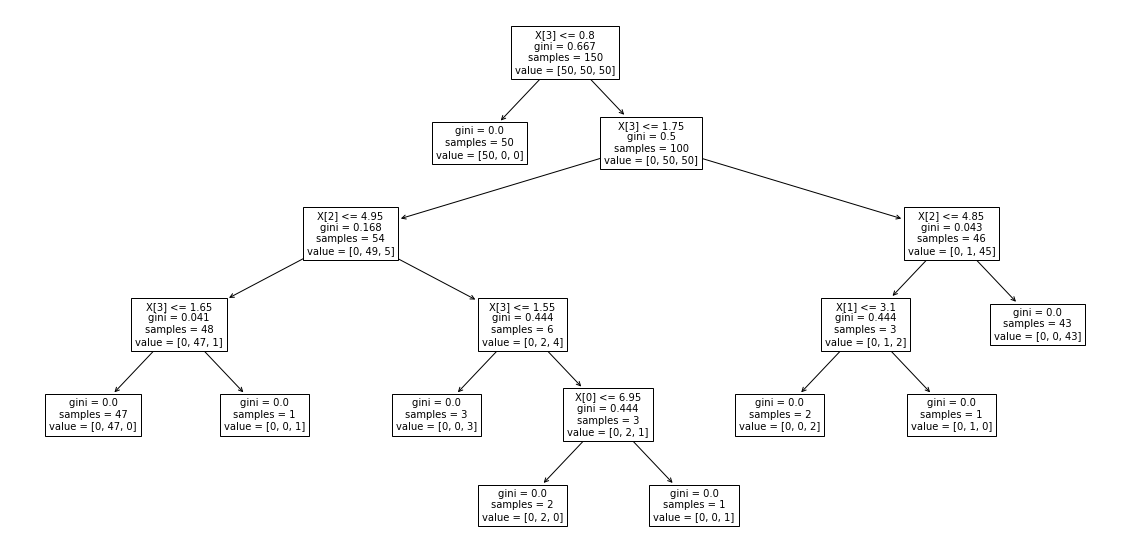

In [57]:
from sklearn.datasets import load_iris
iris= load_iris()
input=iris.data
output=iris.target

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier
model=DT()

model.fit(input,output)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
tree.plot_tree(model,fontsize=10)
